## analyze only the users and not the admins
## analyze only the dates when there were both the views and the checker commits
## use the size of the font should be equal 8
## the size of the figure is (15,8)

In [2]:
import sqlite3 as sqlite
import pandas as pd

con = sqlite.connect('../data/checking-logs.sqlite')

In [3]:
query = '''
    SELECT V.date, V.views, C.commits
    FROM 
        (SELECT date(datetime) as date, count(*) as views FROM pageviews WHERE uid LIKE 'user_%' GROUP BY date) V
    INNER JOIN 
        (SELECT date(timestamp) as date, count(*) as commits FROM checker WHERE uid LIKE 'user_%' GROUP BY date) C
        ON C.date ==  V.date
    GROUP BY V.date
'''
df = pd.read_sql(query, con, parse_dates=['datetime'])
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


## using Pandas method .plot() create a graph
* use the size of the font should be equal 8
* the size of the figure is (15,8)
* the graph must have the title Views per day
* notice the rotation of xticks on the graph below

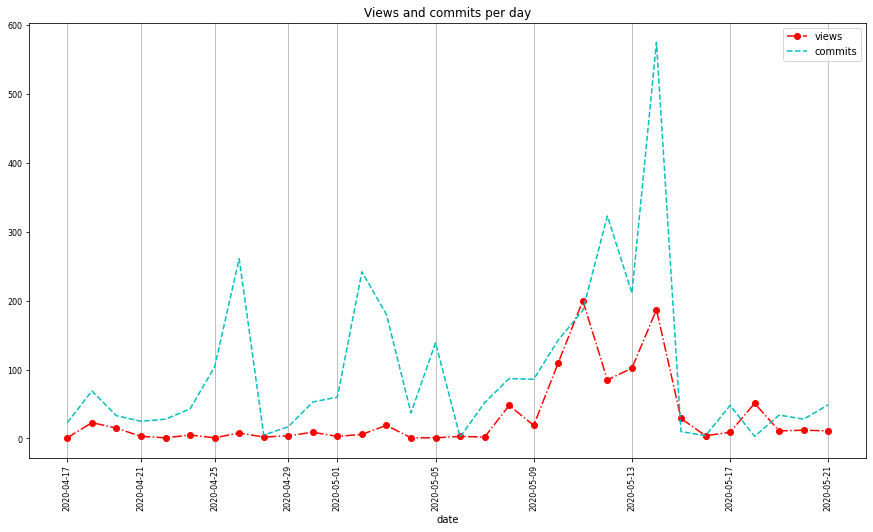

In [45]:
plot = df.plot(fontsize=8, figsize=(15,8), title='Views and commits per day', rot= 90, x='date', style=['ro-.', 'c--'])
tiks = list(range(0,10,3))
tiks.extend(range(11, 32, 4))
plot.set_xticks(tiks)
plot.set_xticklabels(df['date'].iloc[tiks])
plot.xaxis.grid()

How many times the number of the views was larger than 150?


In [ ]:
print(f"The answer is {len(df[df['views'] > 150])}")

The answer is 2


## close the connection to the database

In [ ]:
con.close()